# Edge Detection Filter

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

%matplotlib inline

### Displaying Image

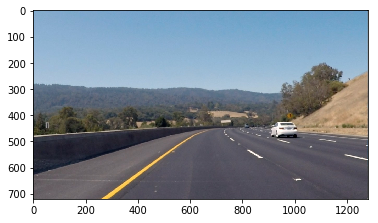

In [3]:
image = mpimg.imread('images/curved_lane.jpg')
plt.imshow(image);

### Convert the Image to Grayscale

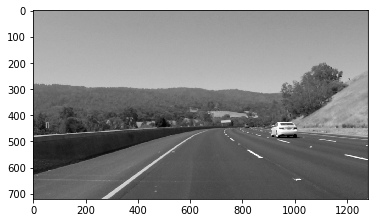

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray');

### Creating Custom Kernels

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. 
Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately.

<img src="images/sobel_ops.png" width=200 height=200>

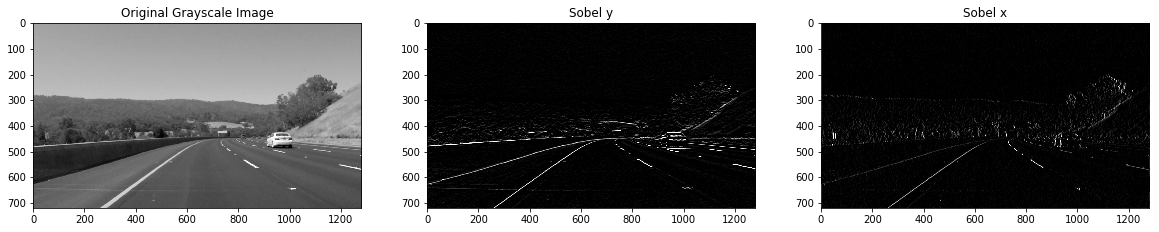

In [20]:
# Sobel y Filter
sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

## Sobel x Filter
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Filtering the image
filtered_image_H = cv2.filter2D(gray, -1, sobel_y)
filtered_image_V = cv2.filter2D(gray, -1, sobel_x)

# Plotting the filtered images
fig, axs = plt.subplots(1,3,figsize=(20,10))
axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original Grayscale Image');
axs[1].imshow(filtered_image_H, cmap='gray');
axs[1].set_title('Sobel y');
axs[2].imshow(filtered_image_V, cmap='gray');
axs[2].set_title('Sobel x');

**Sobel y** emphasizes on extracting the horizontal lines; on the other hand **Sobel x** extracts the vertical lines.

### Creating a Binary Image
A threshold sets all the filtered pixels to white above a certain threshold.

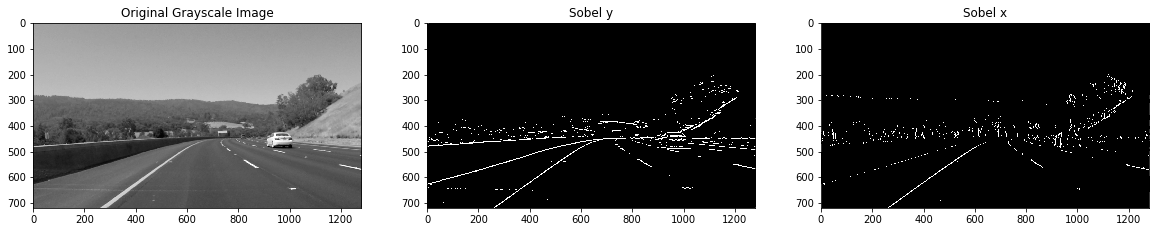

In [22]:
_, binary_filtered_H = cv2.threshold(filtered_image_H, 50, 255, cv2.THRESH_BINARY)
_, binary_filtered_V = cv2.threshold(filtered_image_V, 50, 255, cv2.THRESH_BINARY)

# Plotting the binary image
fig, axs = plt.subplots(1,3,figsize=(20,10))
axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original Grayscale Image');
axs[1].imshow(binary_filtered_H, cmap='gray');
axs[1].set_title('Sobel y');
axs[2].imshow(binary_filtered_V, cmap='gray');
axs[2].set_title('Sobel x');

One of the problems with High-Pass Filters is that it can often exaggerate the **noise** in an image. Thus, to avoid this a **Low-Pass Filter** is applied to blur out the image and then applying the High-Pass Filter.